# **First ML project**

#Loading in a dataset


In [2]:
import pandas as pd
df  = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data Preparation**

##Data seperation in X and Y

In [5]:
Y = df['logS']
Y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [6]:
X = df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Spliting data into Training and Testing

In [7]:
#To split data into Training and Testing we use a library called sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y , test_size=0.2, random_state=100)

In [8]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [9]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Building**

## Linear Regression

###Training the model to make prediction

```
# This is formatted as code
```



In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [11]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

In [ ]:
Y_lr_train_pred

In [ ]:
Y_lr_test_pred


###***Evaluate Model Performance***

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

In [31]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Methods', 'Training MSE', 'Training r2', 'Testing MSE', 'Testing r2']

In [32]:
lr_results

,Methods,Training MSE,Training r2,Testing MSE,Testing r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


##**Random Forest**

###**Training the model**

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state = 100)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying model to make predication

In [34]:
Y_rf_train_pred = rf.predict(X_train)
Y_rf_test_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(Y_train, Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)

rf_test_mse = mean_squared_error(Y_test, Y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, Y_rf_test_pred)

In [37]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Methods', 'Training MSE', 'Training r2', 'Testing MSE', 'Testing r2']
rf_results

,Methods,Training MSE,Training r2,Testing MSE,Testing r2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparing**

In [43]:
df_models = pd.concat([lr_results, rf_results],axis = 0).reset_index(drop = True)

In [44]:
df_models

,Methods,Training MSE,Training r2,Testing MSE,Testing r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization**

Text(0.5, 0, 'Experimental logS')

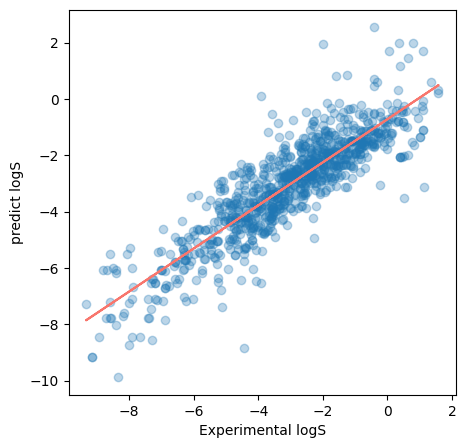

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x= Y_train, y=Y_lr_train_pred,alpha = 0.3)

z=np.polyfit(Y_train,Y_lr_train_pred,1)
p=np.poly1d(z)

plt.plot(Y_train,p(Y_train),'#F8766D')
plt.ylabel('predict logS')
plt.xlabel('Experimental logS')

Text(0.5, 0, 'Experimental logS')

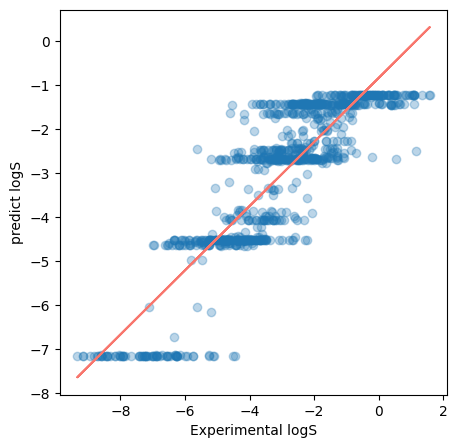

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(x= Y_train, y=Y_rf_train_pred,alpha = 0.3)

z=np.polyfit(Y_train,Y_rf_train_pred,1)
p=np.poly1d(z)

plt.plot(Y_train,p(Y_train),'#F8766D')
plt.ylabel('predict logS')
plt.xlabel('Experimental logS')